In [1]:
from pathlib import Path
from src.analysis.behavioral_profile import behavioral_dimensions

MODEL_NAME = "llama3"
base_out_dir = Path("relevant_runs_copies") / "main_runs_copies"
questions_out_dir = base_out_dir / f"{MODEL_NAME}_v10_questions"
ws100_out_dir = base_out_dir / f"{MODEL_NAME}_AD_ws100"
urnd_out_dir = base_out_dir / f"{MODEL_NAME}_URNDx_ws10"
other_strats_dir = base_out_dir / f"{MODEL_NAME}_other_strats"
rnd_out_dir = base_out_dir / f"RND_URNDx"

c_blue1 = '#5c509d'
c_green1 = '#7dc0a7'
c_green2 = '#39d05c'
c_violet1 = '#301466'
c_gray1 = '#444444'
c_orange1 = '#ECA72C'

checkers_names = ["time", "rule", "aggregation"]  # TODO FIX CHECKERS NAMES
comprehension_questions_labels = ['min_max', 'actions', 'payoff', 'round', 'action$_i$', 'points$_i$', '#actions', '#points']
sfem_strategies_labels = ['AD', 'RND', 'AC', 'TFT', 'STFT', 'GRIM', 'WSLS']
sfem_opponents_labels = ['RND', 'TFT', 'STFT', 'GRIM', 'WSLS']
comprehension_questions_dir = "comprehension_questions"
window_size_effect_dir = "window_size_effect"
behavioral_analysis_dir = "behavioral_analysis"
urnd_str = "URND{p:02}"
rnd_str = "RND"
confidence = 0.95

max_p = 10

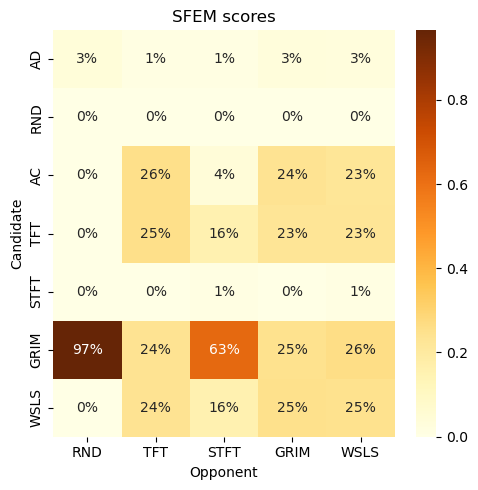

In [2]:
from user_interface_utils import create_csv_sfem_other_strats_results, plot_sfem_matrix

# create_csv_sfem_other_strats_results(other_strats_dir, sfem_opponents_labels)
plot_sfem_matrix(other_strats_dir, sfem_strategies_labels)

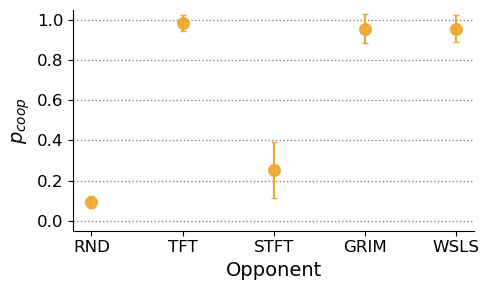

In [3]:
from user_interface_utils import create_csv_cooperation_probability_other_strats_results, plot_coop_probability_vs_other_strats

# create_csv_cooperation_probability_other_strats_results(other_strats_dir, sfem_opponents_labels)
plot_coop_probability_vs_other_strats(other_strats_dir, MODEL_NAME)

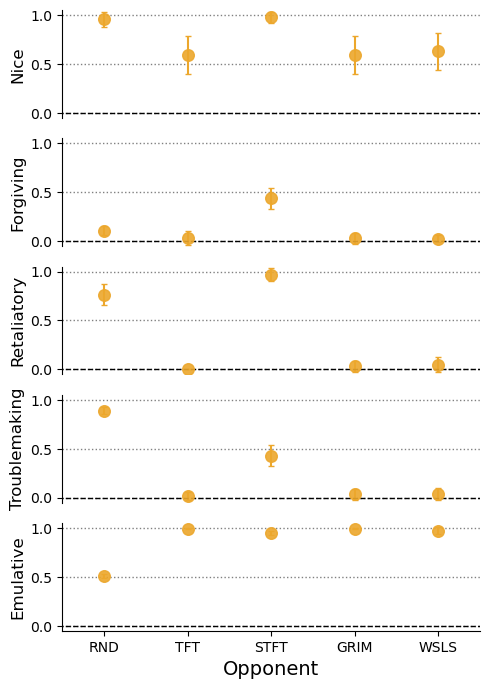

In [4]:
from user_interface_utils import create_csv_behavioral_profile_other_strats_results, plot_behavioral_profile_vs_other_strats

# create_csv_behavioral_profile_other_strats_results(other_strats_dir, MODEL_NAME, sfem_opponents_labels)
plot_behavioral_profile_vs_other_strats(other_strats_dir, MODEL_NAME, sfem_opponents_labels)